In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


In [3]:
df=pd.read_csv('C:/Users/User/Desktop/cardio.csv',sep=';')

In [4]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.cardio.value_counts()

0    34679
1    34622
Name: cardio, dtype: int64

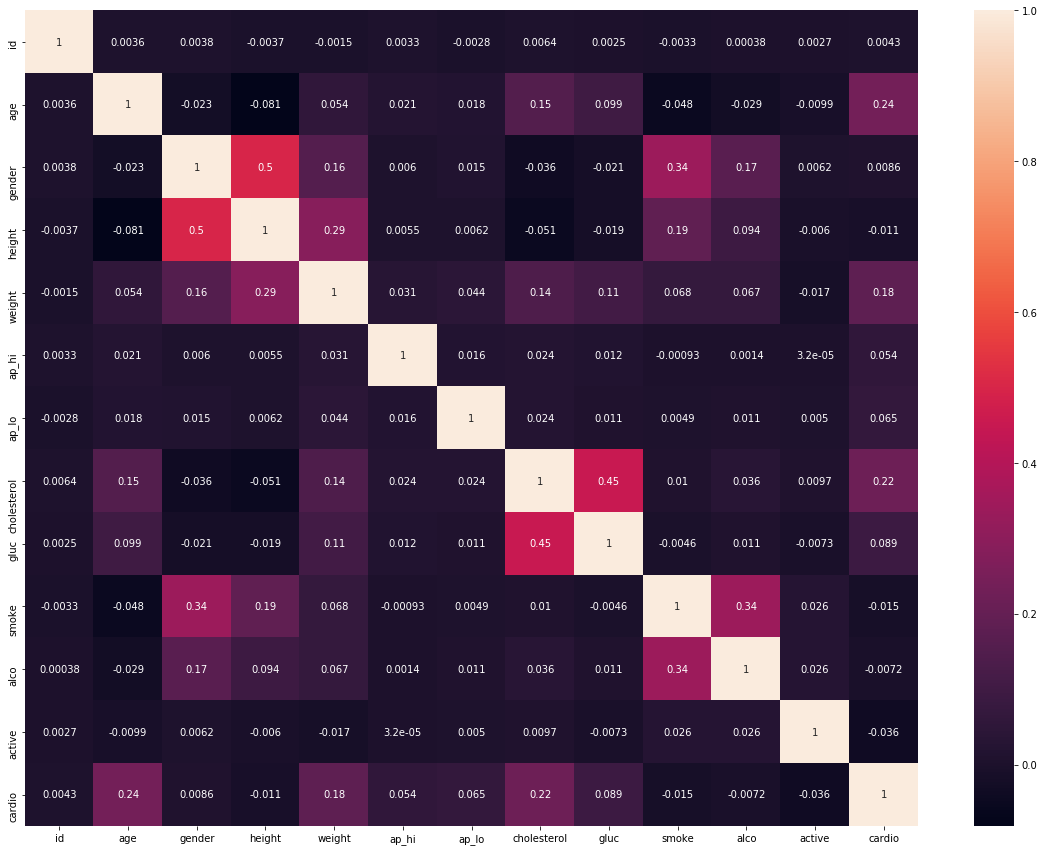

In [8]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [9]:
X = df[['smoke']]

In [10]:
y=df['cardio']

In [11]:
X.head()

,smoke
0,0
1,0
2,0
3,1
4,0


In [12]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: cardio, dtype: int64

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
clf_lrs = LogisticRegression()

In [15]:
clf_lrs.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
clf_lrs.coef_

array([[-0.10746122]])

In [17]:
clf_lrs.intercept_

array([0.00780982])

In [18]:
import statsmodels.api as sn 

In [19]:
X_cons = sn.add_constant(X)

In [20]:
X_cons.head()

,const,smoke
0,1.0,0
1,1.0,0
2,1.0,0
3,1.0,1
4,1.0,0


In [21]:
import statsmodels.discrete.discrete_model as sm

In [22]:
logit =sm.Logit(y,X_cons).fit()

Optimization terminated successfully.
         Current function value: 0.693031
         Iterations 3


In [23]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 cardio   No. Observations:                69301
Model:                          Logit   Df Residuals:                    69299
Method:                           MLE   Df Model:                            1
Date:                Sun, 09 Aug 2020   Pseudo R-squ.:               0.0001673
Time:                        20:49:41   Log-Likelihood:                -48028.
converged:                       True   LL-Null:                       -48036.
Covariance Type:            nonrobust   LLR p-value:                 6.105e-05
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0078      0.008      0.983      0.326      -0.008       0.023
smoke         -0.1075      0.027     -4.006      0.000      -0.160      -0.055
==============================================================================
"""

In [24]:
X= df.loc[:,df.columns !='cardio']

In [25]:
y=df['cardio']

In [26]:
X.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,988,22469,1,155,69.0,130,80,2,2,0,0,1
1,989,14648,1,163,71.0,110,70,1,1,0,0,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1
3,991,14549,2,165,85.0,120,80,1,1,1,1,1
4,992,23393,1,155,62.0,120,80,1,1,0,0,1


In [27]:
y=df['cardio']

In [28]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: cardio, dtype: int64

In [29]:
clf_lr= LogisticRegression()
clf_lr.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
clf_lr.coef_

array([[-6.69252729e-07,  1.08755835e-04,  8.83815495e-05,
        -4.87467026e-02,  2.11485274e-02,  3.43356662e-02,
         3.60274962e-04,  2.78013324e-03,  4.98438873e-04,
        -3.57921330e-05, -4.94375742e-05, -7.72043908e-04]])

In [31]:
clf_lr.intercept_

array([-0.00042181])

In [32]:
X_cons =sn.add_constant(X)

In [33]:
logit =sm.Logit(y,X_cons).fit()

Optimization terminated successfully.
         Current function value: 0.592453
         Iterations 7


In [34]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 cardio   No. Observations:                69301
Model:                          Logit   Df Residuals:                    69288
Method:                           MLE   Df Model:                           12
Date:                Sun, 09 Aug 2020   Pseudo R-squ.:                  0.1453
Time:                        20:49:42   Log-Likelihood:                -41058.
converged:                       True   LL-Null:                       -48036.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -8.4674      0.216    -39.225      0.000      -8.891      -8.044
id           1.789e-07   2.95e-07      0.608      0.543   -3.98e-07    7.56e-07
age             0.0001   3.57e-06     41.691      0.000       0.000       0.000
gender          0.0196      0.021      0.926      0.354      -0.022       0.061
height         -0.0059      0.001     -4.786      0.000      -0.008      -0.003
weight          0.0155      0.001     23.300      0.000       0.014       0.017
ap_hi           0.0393      0.001     64.700      0.000       0.038       0.040
ap_lo           0.0003   6.69e-05      4.412      0.000       0.000       0.000
cholesterol     0.5237      0.015     34.797      0.000       0.494       0.553
gluc           -0.1205      0.017     -7.054      0.000      -0.154      -0.087
smoke          -0.1309      0.033     -3.929      0.000      -0.196      -0.066
alco           -0.1701      0.040     -4.215      0.000      -0.249      -0.091
active         -0.2105      0.021     -9.951      0.000      -0.252      -0.169
===============================================================================
"""

In [35]:
clf_lr.predict_proba(X)

array([[0.30061029, 0.69938971],
       [0.74028644, 0.25971356],
       [0.50758317, 0.49241683],
       ...,
       [0.17829324, 0.82170676],
       [0.35043216, 0.64956784],
       [0.60903794, 0.39096206]])

In [36]:
y_pred =clf_lr.predict(X)
y_pred

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [37]:
y_pred_03 =(clf_lr.predict_proba(X)[:,1]>=0.3).astype(bool)

In [38]:
y_pred_03

array([ True, False,  True, ...,  True,  True,  True])

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,y_pred)

array([[25297,  9382],
       [11728, 22894]], dtype=int64)

In [40]:
confusion_matrix(y,y_pred_03)

array([[ 8321, 26358],
       [ 1919, 32703]], dtype=int64)

In [41]:
from sklearn.metrics import precision_score, recall_score

In [42]:
precision_score(y,y_pred)

0.7093196182922296

In [43]:
recall_score(y,y_pred)

0.6612558488822137

In [44]:
from sklearn.metrics import roc_auc_score

In [45]:
roc_auc_score(y,y_pred)

0.6953587413620099

In [46]:
X= df.loc[:,df.columns !='cardio']
type(X)

pandas.core.frame.DataFrame

In [47]:
y=df['cardio']
type(y)

pandas.core.series.Series

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [50]:
X_train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
21385,31543,18157,1,158,69.0,120,80,1,1,0,0,1
41266,59936,15373,2,157,55.0,130,80,1,1,0,0,0
18901,27988,23572,2,173,68.0,140,90,1,1,0,0,0
27853,40826,21882,2,164,70.0,120,70,1,1,0,0,1
2458,4460,21089,1,152,102.0,140,100,1,1,0,0,0


In [51]:
X_train.shape

(55440, 12)

In [52]:
X_test.shape

(13861, 12)

In [53]:
from sklearn import tree
regtree = tree.DecisionTreeRegressor(max_depth=3)

In [54]:
regtree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [55]:
y_train_pred= regtree.predict(X_train)
y_test_pred = regtree.predict(X_test)

In [56]:
y_test_pred

array([0.86134287, 0.22062084, 0.22062084, ..., 0.41499914, 0.22062084,
       0.86134287])

In [57]:
from sklearn.metrics import mean_squared_error , r2_score

In [58]:
 mean_squared_error(y_test,y_test_pred)

0.18768893881171445

In [59]:
r2_score(y_train,y_train_pred)

0.253871843673227

In [60]:
r2_score(y_test,y_test_pred)

0.24923889521749532

In [61]:
dot_date = tree.export_graphviz(regtree,out_file=None)

In [62]:
from IPython.display import Image 
import pydotplus

ModuleNotFoundError: No module named 'pydotplus'

In [ ]:
X = df.iloc [:,0:-1]
y = df.iloc [:,-1]

In [64]:
X.shape


(69301, 12)

In [65]:
y.shape

(69301,)

In [67]:
print ("shape of X_train =",X_train.shape)
print ("shape of y_train =",y_train.shape)
print ("shape of X_test =",X_test.shape)
print ("shape of y_train =",y_test.shape)

shape of X_train = (55440, 12)
shape of y_train = (55440,)
shape of X_test = (13861, 12)
shape of y_train = (13861,)


In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
classifier = DecisionTreeClassifier(criterion='gini')
classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [71]:
classifier.score(X_test,y_test)

0.6326383377822667

In [77]:
classifier_entropy = DecisionTreeClassifier(criterion='entropy')
classifier_entropy.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [78]:
classifier_entropy.score(X_test,y_test)

0.6390592309357189

In [1]:
pwd

'C:\\Users\\User'